In [5]:
from bisip import mcmcinv
import matplotlib.pyplot as plt
import numpy as np
import os

In [20]:
# Second test run
# This time we want to use a Debye decomposition approach
# We also want more control on the inversion

""" 1.
    Model to use ?"""
model = "ColeCole" # ColeCole model


""" 2.
    Paths to files ?"""
filepath = "/Users/Charles/Documents/SIP dat files/AVG_SIP-Reciprocals_K389160.dat"

""" 3.
    The data file has many headers and the phase units are mrad"""
skip_rows = 3
units = "mrad"

""" 4.
    Markov Chain Monte Carlo parameters ?"""
mcmc = {"adaptive"   : True,
        "nb_chain"   : 1,
        "nb_iter"    : 100000,
        "nb_burn"    : 80000,
        "thin"       : 1,
        "tune_inter" : 1000,
        "prop_scale" : 1.0,
        "verbose"    : False,
        "cov_inter"  : 10000,
        "cov_delay"  : 10000,
        }
    
# This will start the inversion.
# Note that polynomial order used for the decomposition is 4 and the c exponent is 1.0 (Debye)
sol = mcmcinv(model, filepath, mcmc=mcmc, headers=skip_rows, ph_units=units, cc_modes=2)
# The inversion class is stored in sol



MCMC parameters:
 {'adaptive': True, 'nb_chain': 1, 'nb_iter': 100000, 'nb_burn': 80000, 'thin': 1, 'tune_inter': 1000, 'prop_scale': 1.0, 'verbose': False, 'cov_inter': 10000, 'cov_delay': 10000}

Chain #1/1
 [-----------------100%-----------------] 100000 of 100000 complete in 9.3 sec


Saving fit figure in:
 /Users/Charles/Documents/Github/bisip/examples//Figures/Fit figures/


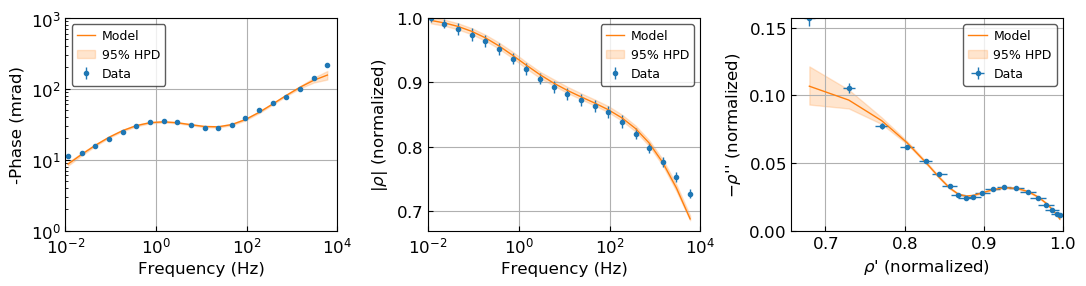

In [19]:
sol.plot_fit() # See the fit

In [8]:
# It's fitted

In [9]:
# The trace for the R0 parameter is contained in the mcmcinv object
# Access the trace for a parameter as follow:
traceR0 = sol.MDL.trace("R0")[:]
print(traceR0)

[ 1.29996375  1.29996375  1.29996375 ...,  1.20223681  1.20223681
  1.20223681]


In [10]:
# We can check that it is iterations - burn_in long (should be 100 000 - 80 000 = 20 000)
len(traceR0)

20000

In [11]:
# Note that 2D parameters are given in a 2x20000 matrix [m1, m2]
#                                                       [.., ..]
#                                                       [.., ..]
traceM = sol.MDL.trace("m")[:]
traceLogTau = sol.MDL.trace("log_tau")[:]
traceC = sol.MDL.trace("c")[:]
print(traceM)

[[  5.20101494e-01   1.89228557e-04]
 [  5.20101494e-01   1.89228557e-04]
 [  5.20101494e-01   1.89228557e-04]
 ..., 
 [  8.35167651e-01   1.16046791e-01]
 [  8.35167651e-01   1.16046791e-01]
 [  8.35167651e-01   1.16046791e-01]]


In [12]:
# Now to stack the parameters togheter
trace_params = np.hstack((traceR0[:,np.newaxis], traceM ,traceLogTau, traceC))
headers = 'R0, m1, m2, log_tau1, log_tau2, c1, c2'

In [13]:
print(trace_params)

[[  1.29996375e+00   5.20101494e-01   1.89228557e-04 ...,   3.81593180e+00
    9.79756580e-02   9.98403763e-01]
 [  1.29996375e+00   5.20101494e-01   1.89228557e-04 ...,   3.81593180e+00
    9.79756580e-02   9.98403763e-01]
 [  1.29996375e+00   5.20101494e-01   1.89228557e-04 ...,   3.81593180e+00
    9.79756580e-02   9.98403763e-01]
 ..., 
 [  1.20223681e+00   8.35167651e-01   1.16046791e-01 ...,   3.63584957e+00
    1.43335635e-01   9.97795249e-01]
 [  1.20223681e+00   8.35167651e-01   1.16046791e-01 ...,   3.63584957e+00
    1.43335635e-01   9.97795249e-01]
 [  1.20223681e+00   8.35167651e-01   1.16046791e-01 ...,   3.63584957e+00
    1.43335635e-01   9.97795249e-01]]


In [14]:
# Save to csv with
np.savetxt('traceofparameters.csv', trace_params, delimiter=',', header=headers, comments="")

In [15]:
# We can check if 'traceofparameters.csv' is saved:
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 'Example1 - First inversion.ipynb',
 'Example2 - MCMC parameters.ipynb',
 'Example3 - Estimating noise levels in the data.ipynb',
 'Example4 - Save traces to csv.ipynb',
 'Example5 - Save traces automatically.ipynb',
 'Figures',
 'Help.ipynb',
 'traceofparameters.csv',
 'Txt traces']

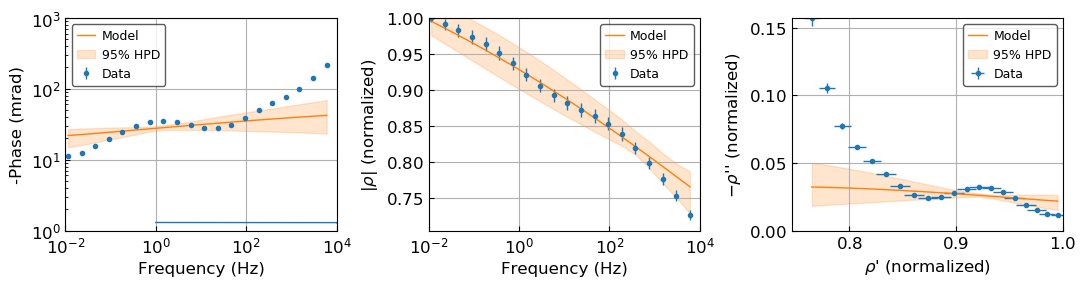

In [16]:
# We can check that our traces are the same as the ones obtained with sol.plot_traces()
plt.plot(traceR0)
plt.show()

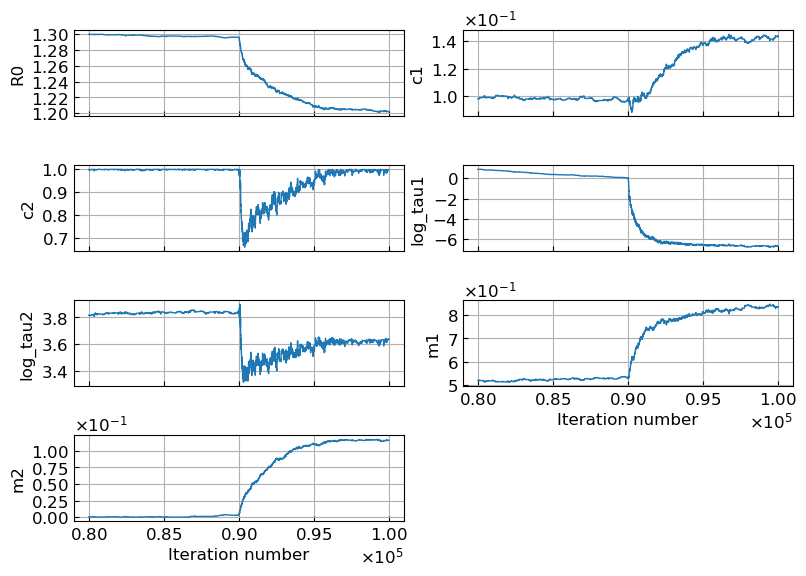

In [17]:
sol.plot_traces()